# Assignment 2 - Questions 1-2-3-4

## Ahmad Soni - 668564

## Nasiem Ayob - 1825850

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import datetime
import gensim
import spacy
import nltk
import re
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

D:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [2]:
nyc_df = pd.read_csv("nyc_taxis.csv")

In [3]:
nyc_df.head();

In [4]:
nyc_df.size;

In [5]:
nyc_df.dtypes;

****
### 1.2 Feature engineering
****

In [6]:
from math import radians, cos, sin, asin, sqrt

def dist(longs, lats):
    R = 6371
    
    lon1, lat1, lon2, lat2 = map(radians, [longs[0], lats[0], longs[1], lats[1]])

    dlon =  lon1 - lon2 
    dlat =  lat1 - lat2
    
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    
    return R * c

In [7]:
def getDay(row_dt):
    dt = row_dt.split(' ')[0].split('-')
    
    days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
    
    d = datetime.date(int(dt[0]),int(dt[1]),int(dt[2])).weekday()
    
    return days[d]

In [8]:
def getHour(sec):
    return sec/(3600)

In [9]:
nyc_df['trip_duration(hour)'] = nyc_df.apply (lambda row: getHour(row[10]), axis=1)

In [10]:
longs = nyc_df[['pickup_longitude','dropoff_longitude']].values.tolist()
lats = nyc_df[['pickup_latitude','dropoff_latitude']].values.tolist()

In [11]:
distances = []

for ln, lt in zip(longs, lats):
    distances.append(dist(ln,lt))   

In [12]:
nyc_df['distance(km)'] = distances

In [13]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.126389,1.498521
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.184167,1.805507
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.590000,6.385098
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.119167,1.485498
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.120833,1.188588


In [14]:
nyc_df['speed(km/h)'] = nyc_df['distance(km)'] / nyc_df['trip_duration(hour)']

In [15]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km),speed(km/h)
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.126389,1.498521,11.856428
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.184167,1.805507,9.803659
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.590000,6.385098,10.822201
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.119167,1.485498,12.465721
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.120833,1.188588,9.836594


In [16]:
nyc_df['day'] = nyc_df.apply (lambda row: getDay(row[3]), axis=1)

In [17]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km),speed(km/h),day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,0.126389,1.498521,11.856428,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,0.184167,1.805507,9.803659,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,0.590000,6.385098,10.822201,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,0.119167,1.485498,12.465721,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,0.120833,1.188588,9.836594,Saturday


In [24]:
nyc_df.to_csv(r'C:\Users\Ahmad\Documents\Coms Hons\DVE\df.csv', index=False)

****
### 1.1 Data cleaning
****

#### passenger_count

<AxesSubplot:xlabel='passenger_count'>

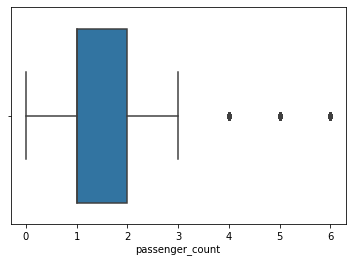

In [18]:
sns.boxplot(x=nyc_df['passenger_count'])

- **Since only 4 passengers are allowed in a nyc cab**.

In [19]:
nyc_df = nyc_df.loc[nyc_df['passenger_count'] <= 4]

#### trip_duration(hours) & distance(km)

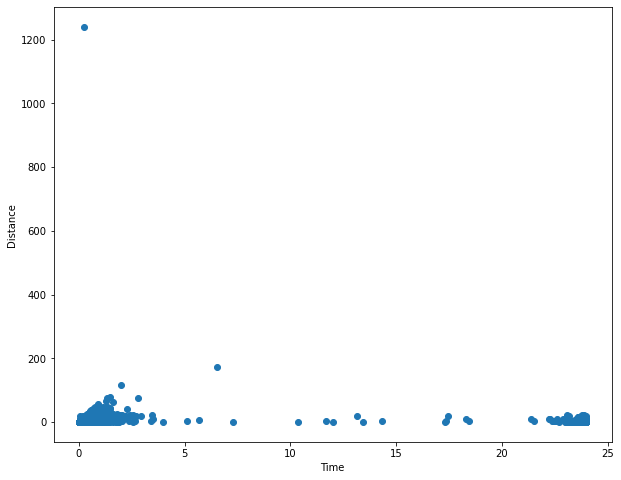

In [20]:
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(nyc_df['trip_duration(hour)'],nyc_df['distance(km)'])
 
# x-axis label
ax.set_xlabel('Time')
 
# y-axis label
ax.set_ylabel('Distance')
plt.show()

 - **From above we can see that there's an outlier above the distance 1200km.This is removed.**

In [21]:
nyc_df.loc[nyc_df['distance(km)'] > 1200]

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km),speed(km/h),day
184925,id2306955,1,2016-05-07 18:58:53,2016-05-07 19:12:05,1,-72.809669,51.881084,-73.987228,40.750599,N,792.0,0.22,1240.908677,5640.493985,Saturday


In [22]:
nyc_df = nyc_df.loc[nyc_df['distance(km)'] < 1200]

****
### 1.3 Time-based questions
****

In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#### **1**.

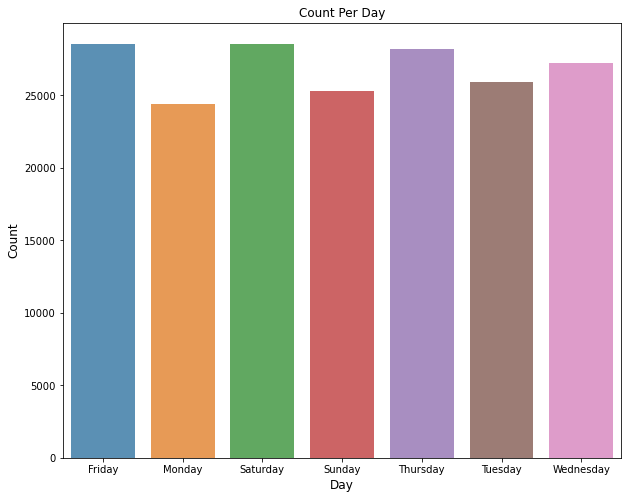

In [24]:
day_count  = nyc_df['day'].value_counts().sort_index()
plt.figure(figsize=(10,8))
sns.barplot(day_count.index, day_count.values, alpha=0.8)
plt.title('Count Per Day')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.show()

- **Saturday is the most popular day**.

#### **2**.

In [25]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km),speed(km/h),day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,0.126389,1.498521,11.856428,Monday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,0.184167,1.805507,9.803659,Sunday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,0.590000,6.385098,10.822201,Tuesday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,0.119167,1.485498,12.465721,Wednesday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,0.120833,1.188588,9.836594,Saturday


In [26]:
def getHourOfDay(dt):
    t = dt.split(' ')[1].split(':')
    
    return t[0]    

In [27]:
nyc_df['hour_of_day'] = nyc_df.apply (lambda row: getHourOfDay(row[3]), axis=1)

In [28]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km),speed(km/h),day,hour_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,0.126389,1.498521,11.856428,Monday,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,0.184167,1.805507,9.803659,Sunday,00
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,0.590000,6.385098,10.822201,Tuesday,12
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,0.119167,1.485498,12.465721,Wednesday,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,0.120833,1.188588,9.836594,Saturday,13


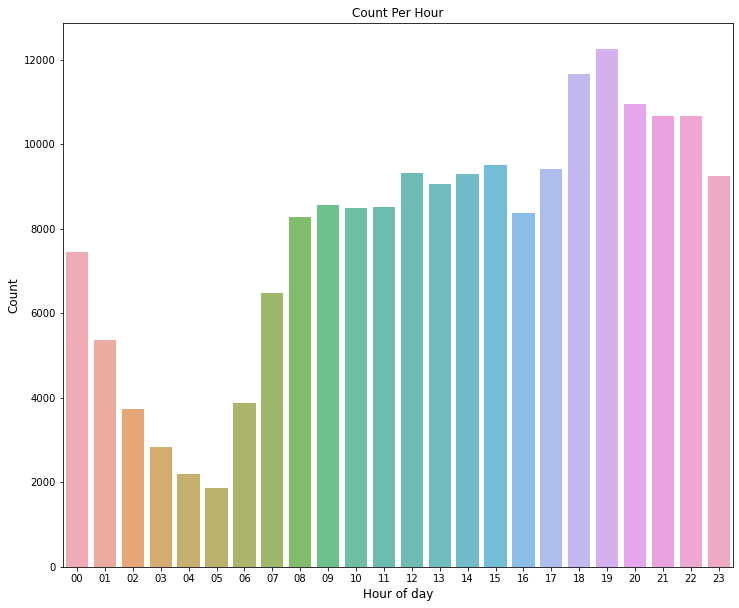

In [29]:
hour_count  = nyc_df['hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(12,10))
sns.barplot(hour_count.index, hour_count.values, alpha=0.8)
plt.title('Count Per Hour')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.show()

- **The 19th hour of the day is the most popular each day.**
- **The reason for this kind of distribution is because after the 5th hour, most people are awake and active as more people make their way to and from work.This decreases after midnight as not many people travel during this time.**

#### **3**.

In [30]:
weekDays = ["Monday","Tuesday","Wednesday","Thursday"]
def isWeekDay(day):
    flag = "Weekend"
    if day in weekDays:
        flag = "Weekday"
    
    return flag

In [31]:
nyc_df['isWeekDay'] = nyc_df.apply (lambda row: isWeekDay(row[14]), axis=1)

In [32]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km),speed(km/h),day,hour_of_day,isWeekDay
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,0.126389,1.498521,11.856428,Monday,17,Weekday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,0.184167,1.805507,9.803659,Sunday,00,Weekend
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,0.590000,6.385098,10.822201,Tuesday,12,Weekday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,0.119167,1.485498,12.465721,Wednesday,19,Weekday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,0.120833,1.188588,9.836594,Saturday,13,Weekend


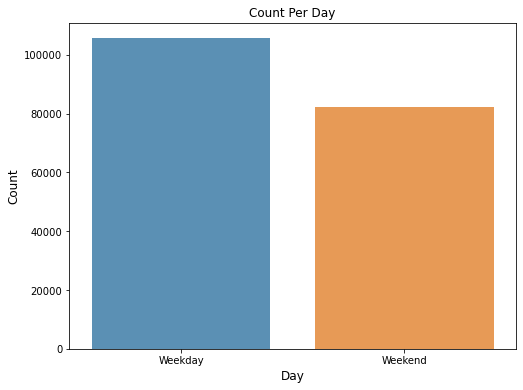

In [33]:
isDay_count  = nyc_df['isWeekDay'].value_counts().sort_index()
plt.figure(figsize=(8,6))
sns.barplot(isDay_count.index, isDay_count.values, alpha=0.8)
plt.title('Count Per Day')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.show()

- **There are a larger number of people taking a cab during the week than weekends.**
- **This is due to he fact that most people work during the week instead of weekends, this result in more cab commuters during the week than that of the weekend.** 

#### **4**.

#### Major American Holidays between 2016-01-01 and 2016-06-30.

In [34]:
holidays = [ ["New Year's Day", "2016-01-01"], 
            ["Martin Luther King Jr. Day", "2016-01-18"], 
            ["St. Patrick's Day", "2016-03-17"], 
            ["Easter", "2016-03-27"], 
            ["Memorial Day", "2016-05-30"] ]

holiday_df = pd.DataFrame(holidays, columns = ['Holiday', 'Date'])
  
holiday_df.head()

,Holiday,Date
0,New Year's Day,2016-01-01
1,Martin Luther King Jr. Day,2016-01-18
2,St. Patrick's Day,2016-03-17
3,Easter,2016-03-27
4,Memorial Day,2016-05-30


In [35]:
holiday_dates = holiday_df['Date'].values.tolist()
def isHoliday(row_dt):
    flag = "Not a Holiday"
    dt = row_dt.split(' ')[0]
    if dt in holiday_dates:
        flag = "Holiday"
    
    return flag

In [36]:
nyc_df['isHoliday'] = nyc_df.apply (lambda row: isHoliday(row[3]), axis=1)

In [37]:
nyc_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_duration(hour),distance(km),speed(km/h),day,hour_of_day,isWeekDay,isHoliday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455.0,0.126389,1.498521,11.856428,Monday,17,Weekday,Not a Holiday
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663.0,0.184167,1.805507,9.803659,Sunday,00,Weekend,Not a Holiday
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124.0,0.590000,6.385098,10.822201,Tuesday,12,Weekday,Not a Holiday
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429.0,0.119167,1.485498,12.465721,Wednesday,19,Weekday,Not a Holiday
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435.0,0.120833,1.188588,9.836594,Saturday,13,Weekend,Not a Holiday


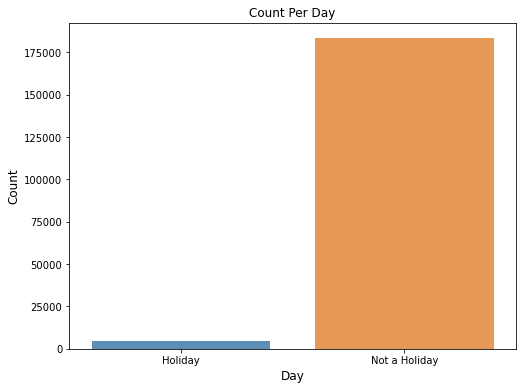

In [38]:
isHoliday_count  = nyc_df['isHoliday'].value_counts().sort_index()
plt.figure(figsize=(8,6))
sns.barplot(isHoliday_count.index, isHoliday_count.values, alpha=0.8)
plt.title('Count Per Day')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day', fontsize=12)
plt.show()

- **There is evidently a large gap between the number of people taking a cab during a major holiday and during an ordinary day.**
- **This is due to there only being 5 major holidays between 2016-01-01 and 2016-06-30.**

#### **5**.

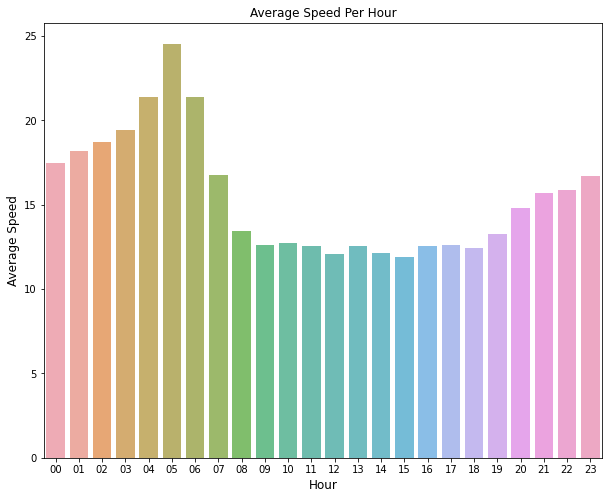

In [39]:
daySpeed_avg  = nyc_df.groupby('hour_of_day')['speed(km/h)'].mean()
plt.figure(figsize=(10,8))
sns.barplot(daySpeed_avg .index, daySpeed_avg .values, alpha=0.8)
plt.title('Average Speed Per Hour')
plt.ylabel('Average Speed', fontsize=12)
plt.xlabel('Hour', fontsize=12)
plt.show()

- **The average speed increases from midnight to 5 in the morning, this could be due to the lack of traffic during these hours.**
- **The average speed then decreases after 5 in the moring as more people are active and making their way to work, this results in more traffic.**
- **After the 18th hour, the average speed once again increases due to less cars being on the road.**

****
### 1.4 Location clusters
****

#### Select certain hours of the weekdays & weekends

In [40]:
hours_df = nyc_df.loc[(nyc_df['hour_of_day'] >= '20') & (nyc_df['hour_of_day'] < '3')]

In [41]:
df = hours_df[['pickup_longitude','pickup_latitude']]
df.head()

,pickup_longitude,pickup_latitude
6,-73.969017,40.757839
8,-73.999481,40.738400
9,-73.981049,40.744339
10,-73.982651,40.763840
13,-73.956306,40.767941


#### Scale the coordinates

In [42]:
coords = df[['pickup_longitude','pickup_latitude']].values.tolist()

In [43]:
X = StandardScaler().fit_transform(coords)
df = pd.DataFrame(X.tolist(), columns = ['longitude(scaled)', 'latitude(scaled)'])
df.head()

,longitude(scaled),latitude(scaled)
0,0.131293,0.345417
1,-0.621026,-0.337760
2,-0.165829,-0.129027
3,-0.205395,0.556295
4,0.445183,0.700411


In [44]:
dbscan=DBSCAN()
dbscan.fit(X)

DBSCAN()

In [45]:
colours=['purple','red','blue','green']

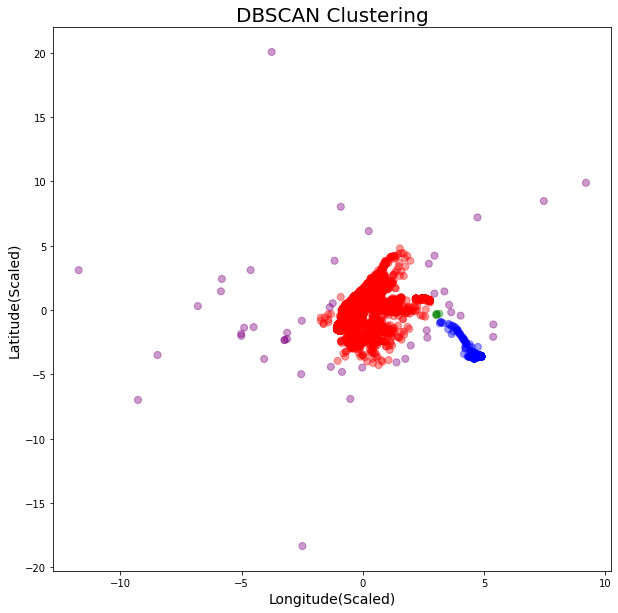

In [46]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df['longitude(scaled)'],df['latitude(scaled)'],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colours),s=50,alpha=0.4)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Longitude(Scaled)',fontsize=14)
plt.ylabel('Latitude(Scaled)',fontsize=14)
plt.show()

In [47]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df[['longitude(scaled)','latitude(scaled)']])
distances, indices = nbrs.kneighbors(df[['longitude(scaled)','latitude(scaled)']])

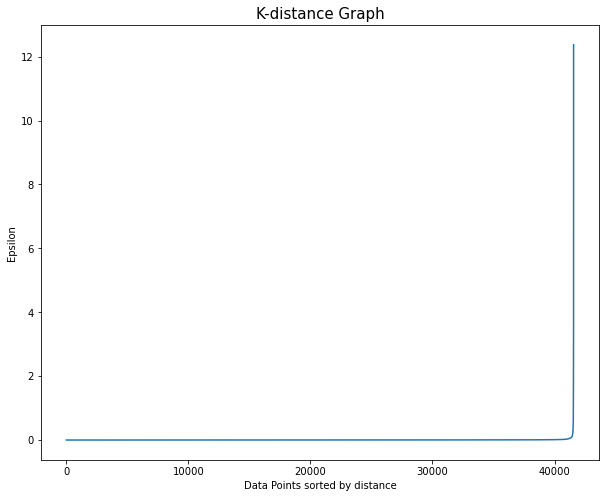

In [48]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,8))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=15)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

- **The above graph shows that the best epsilon value is at the curvature, which is between 0 & 1.**
- **We decided to choose the default epsilon value i.e. eps = 0.5.**
- **We chose 15 as the number of min_samples as it is recommended for min_samples >= Dimensions+1.**
- **We noticed that changing the min_samples from the default min_samples did not change the original heatmap, the number of clusters remained the same**

In [49]:
dbscan_opt=DBSCAN(eps=0.5,min_samples=15)
dbscan_opt.fit(X)

DBSCAN(min_samples=15)

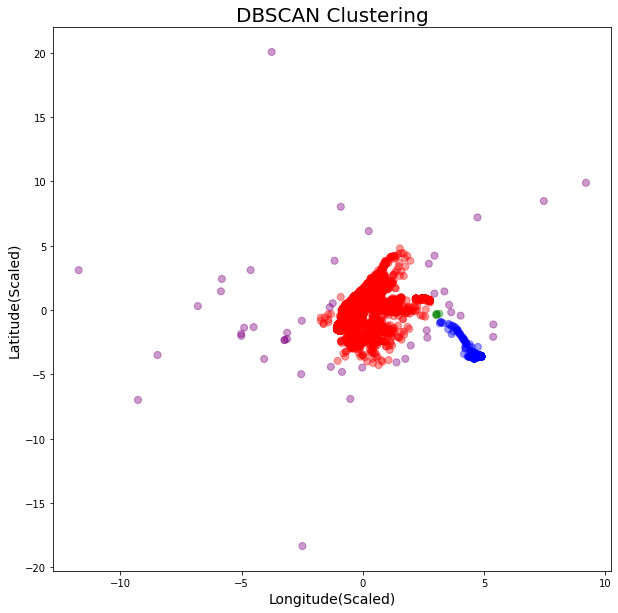

In [50]:
df['DBSCAN_opt_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df['longitude(scaled)'],df['latitude(scaled)'],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colours),s=50,alpha=0.4)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Longitude(Scaled)',fontsize=14)
plt.ylabel('Latitude(Scaled)',fontsize=14)
plt.show()

- **The heatmaps above has classified the coordinates into three different pickup locations or clusters, red, blue and green. The purple colour represents the noise.**